In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from scipy.fft import fft2, ifft2, fftshift
from skimage import io, util, img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio

plt.style.use('dark_background')

In [65]:
def PSD(signal):
    auto_corr_signal = np.abs(ifft2(np.abs(fft2(signal))**2))
    return fftshift(auto_corr_signal)

In [66]:
def CPSD(signal1, signal2):
    auto_corr_signal = np.conj(fft2(signal1)) * fft2(signal2)
    return fftshift(auto_corr_signal)

In [86]:
def wiener_filter_denoise(noisy_image, desired_image):
    # Calculate the CPSD between the noisy image and the desired image
    cpsd = CPSD(noisy_image, desired_image)
    # Calculate the PSD of the noisy image
    psd_noise = PSD(noisy_image)
    # Calculate the Wiener filter gain
    gain = cpsd / (cpsd + psd_noise)
    # Convert the noisy image to the frequency domain
    noisy_freq = fft2(noisy_image)
    # Apply the gain to each frequency component
    filtered_freq = gain * noisy_freq
    # Convert the filtered frequency components back to the spatial domain
    denoised_image = np.real(ifft2(filtered_freq))
    denoised_image = np.clip(denoised_image, -1, 1)
    return denoised_image

In [87]:
original_image = io.imread('data/lena.png')
noisy_image = util.random_noise(original_image, mode='gaussian')
denoised_image = wiener(noisy_image)

In [88]:
denoised_image2 = wiener_filter_denoise(noisy_image, original_image)

In [89]:
denoised_image2.max(), denoised_image2.min()

(1.0, -1.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


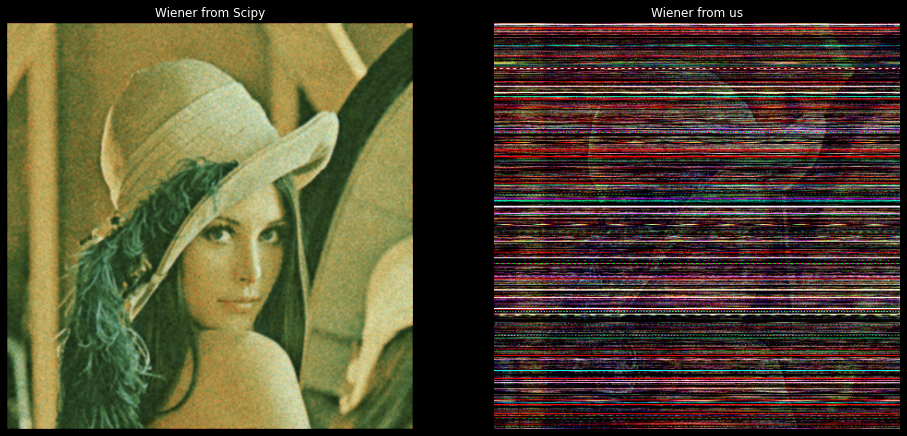

In [90]:
plt.figure(figsize=(16, 24))
plt.subplot(1, 2, 1)
plt.imshow(denoised_image)
plt.axis('off')
plt.title('Wiener from Scipy')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image2)
plt.axis('off')
plt.title('Wiener from us')

plt.show()

In [92]:
original_image = img_as_ubyte(original_image)
denoised_image = img_as_ubyte(denoised_image)
denoised_image2 = img_as_ubyte(denoised_image2)

psnr_value_scipy = peak_signal_noise_ratio(original_image, denoised_image)
psnr_value_us = peak_signal_noise_ratio(original_image, denoised_image2)
print("PSNR from SciPy:", psnr_value_scipy)
print("PSNR from us:", psnr_value_us)

PSNR from SciPy: 15.473852622803545
PSNR from us: 7.569236860256629
